In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("C:/Users/bruno/user_car_project/data/raw/used_cars_data.csv")

In [5]:
df.shape

(792, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     792 non-null    int64 
 1   brand          792 non-null    object
 2   model          792 non-null    object
 3   price (eur)    792 non-null    int64 
 4   engine         792 non-null    object
 5   year           792 non-null    int64 
 6   mileage (kms)  792 non-null    int64 
 7   fuel           792 non-null    object
 8   gearbox        792 non-null    object
 9   location       792 non-null    object
dtypes: int64(4), object(6)
memory usage: 62.0+ KB


In [7]:
df.describe()

,Unnamed: 0,price (eur),year,mileage (kms)
count,792.000000,792.000000,792.000000,792.000000
mean,395.500000,15973.383838,2016.404040,83228.833333
std,228.774999,6984.338370,2.452251,46202.118589
min,0.000000,4990.000000,2004.000000,1258.000000
25%,197.750000,11355.000000,2015.000000,47145.500000
50%,395.500000,14990.000000,2017.000000,80065.500000
75%,593.250000,18490.000000,2018.000000,116321.750000
max,791.000000,82580.000000,2021.000000,220000.000000


In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

In [10]:
df.columns = (
    df.columns
     .str.lower()
     .str.replace(" ", "_")
     .str.replace("(", "")
     .str.replace(")", "")
)

In [11]:
df["price_eur"].describe()

count      792.000000
mean     15973.383838
std       6984.338370
min       4990.000000
25%      11355.000000
50%      14990.000000
75%      18490.000000
max      82580.000000
Name: price_eur, dtype: float64

In [12]:
target = ("price_eur")

In [13]:
df.columns

Index(['unnamed:_0', 'brand', 'model', 'price_eur', 'engine', 'year',
       'mileage_kms', 'fuel', 'gearbox', 'location'],
      dtype='object')

In [14]:
df.columns


Index(['unnamed:_0', 'brand', 'model', 'price_eur', 'engine', 'year',
       'mileage_kms', 'fuel', 'gearbox', 'location'],
      dtype='object')

In [15]:
df[target].describe()

count      792.000000
mean     15973.383838
std       6984.338370
min       4990.000000
25%      11355.000000
50%      14990.000000
75%      18490.000000
max      82580.000000
Name: price_eur, dtype: float64

In [16]:
import numpy as np

In [17]:
df["car_age"] = 2026 - df["year"]

In [18]:
df["log_price"] = np.log(df[target])

In [19]:
df[["year","car_age"]].head()

,year,car_age
0,2016,10
1,2014,12
2,2011,15
3,2018,8
4,2016,10


In [20]:
df[["price_eur", "log_price"]].head()

,price_eur,log_price
0,8990,9.103868
1,9990,9.209340
2,13490,9.509704
3,24990,10.126231
4,10460,9.255314


In [21]:
plt.figure(figsize=(8,4))

<Figure size 800x400 with 0 Axes>

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='price_eur', ylabel='Count'>

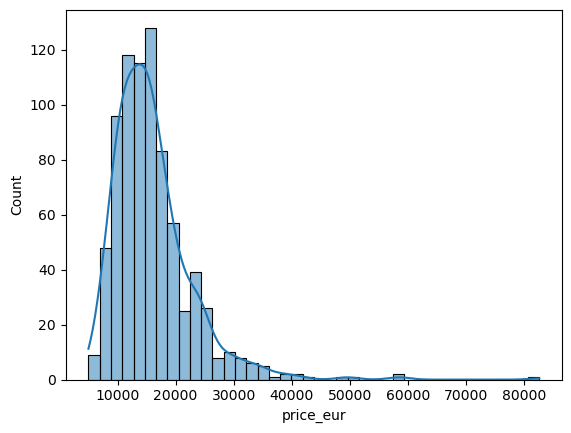

In [22]:
sns.histplot(df["price_eur"], bins=40, kde=True)

<Axes: xlabel='log_price', ylabel='Count'>

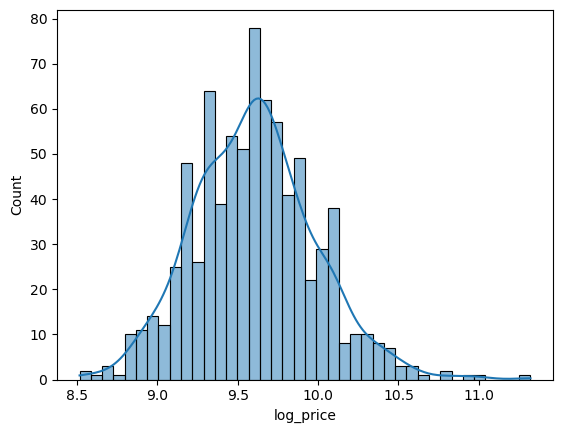

In [23]:
sns.histplot(df["log_price"], bins=40, kde=True)

<Axes: xlabel='mileage_kms', ylabel='price_eur'>

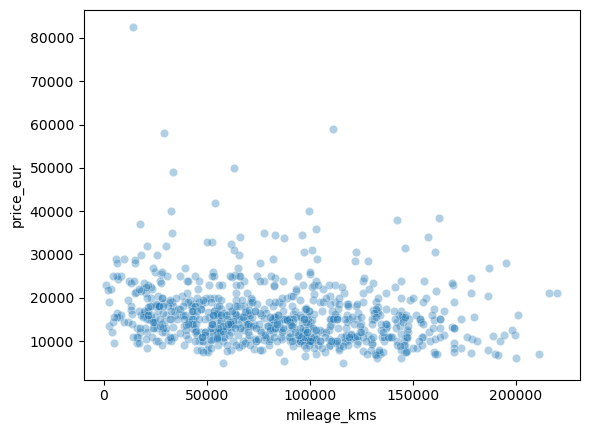

In [24]:
sns.scatterplot(x="mileage_kms", y="price_eur", data=df, alpha=0.35)

<Axes: xlabel='car_age', ylabel='price_eur'>

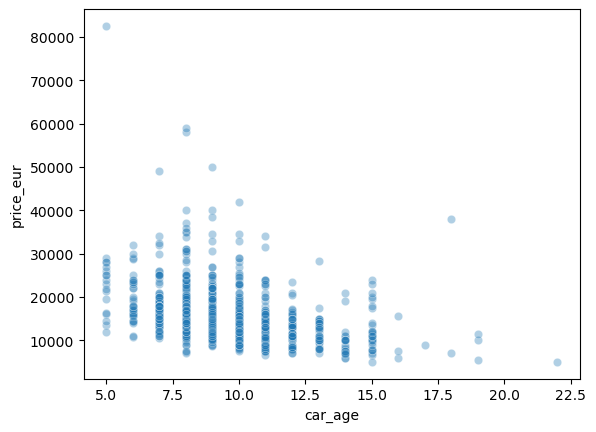

In [25]:
sns.scatterplot(x="car_age", y="price_eur", data=df, alpha=0.35)

In [26]:
y = df["log_price"]

In [27]:
X = df.drop(columns=["price_eur", "log_price"])

In [28]:
X.dtypes

unnamed:_0      int64
brand          object
model          object
engine         object
year            int64
mileage_kms     int64
fuel           object
gearbox        object
location       object
car_age         int64
dtype: object

In [29]:
X = X.drop(columns=["unnamed:_0"], errors="ignore")

In [30]:
X.columns

Index(['brand', 'model', 'engine', 'year', 'mileage_kms', 'fuel', 'gearbox',
       'location', 'car_age'],
      dtype='object')

In [31]:
num_features = X.select_dtypes(include=["int64", "float64"]).columns

In [32]:
cat_features = X.select_dtypes(include=["object"]).columns

In [33]:
"unnamed:_0" not in X.columns

True

In [34]:
not any("unnamed" in col for col in X.columns)

True

In [35]:
[name for name in dir(pd) if "dummy" in name.lower()]

[]

In [36]:
encoded_X = pd.get_dummies(X[cat_features])

In [37]:
X_final = pd.concat([X[num_features], encoded_X], axis=1)

In [38]:
X_final.shape

(792, 956)

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=790)

In [41]:
X_train.shape

(633, 956)

In [42]:
X_test.shape

(159, 956)

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
model = LinearRegression()

In [45]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [46]:
y_predict = model.predict(X_test)

In [47]:
y_predict.shape

(159,)

In [48]:
y_test.shape

(159,)

In [49]:
from sklearn.metrics import mean_squared_error

In [50]:
mse = mean_squared_error(y_test, y_predict)

In [51]:
rmse = np.sqrt(mse)

In [52]:
rmse

np.float64(0.15473823425143748)

In [53]:
from sklearn.ensemble import RandomForestRegressor

In [54]:
model2 = RandomForestRegressor(n_estimators=200, random_state=790)

In [55]:
model2.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [56]:
model2

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [57]:
y_predict = model2.predict(X_test)

In [58]:
y_predict.shape

(159,)

In [59]:
y_test.shape

(159,)

In [60]:
mse = mean_squared_error(y_test, y_predict)

In [61]:
rmse = np.sqrt(mse)

rmse

In [62]:
rmse

np.float64(0.20750138058035414)

In [70]:
importances = model2.feature_importances_

In [71]:
feature_importances_df = pd.DataFrame({
    "feature": X_final.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

In [73]:
feature_importances_df.head(10)

,feature,importance
944,gearbox_Automatica,0.157676
945,gearbox_Manual,0.108450
0,year,0.105992
2,car_age,0.103487
1,mileage_kms,0.063884
22,brand_Mercedes,0.023160
214,model_Tipo,0.015409
939,fuel_Diésel,0.013549
6,brand_BMW,0.012256
37,brand_Volkswagen,0.011186


In [75]:
top10 = feature_importances_df.head(10)

In [76]:
import matplotlib.pyplot as plt

In [77]:
plt.figure(figsize=(8, 5))

<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

<BarContainer object of 10 artists>

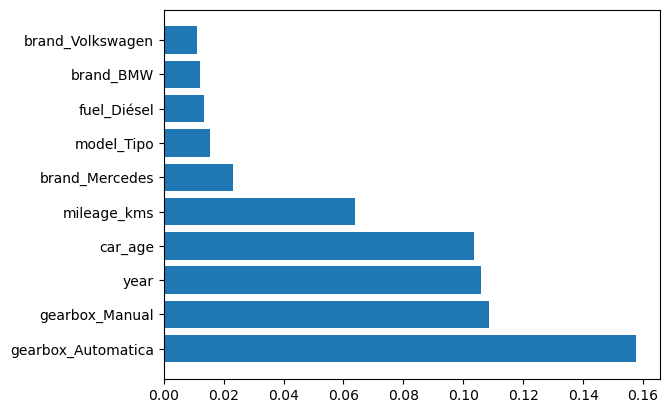

In [78]:
plt.barh(top10["feature"], top10["importance"])

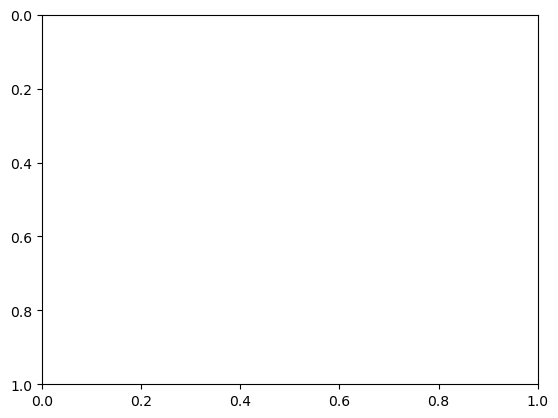

In [79]:
plt.gca().invert_yaxis()

Text(0.5, 0, 'Feature Importance')

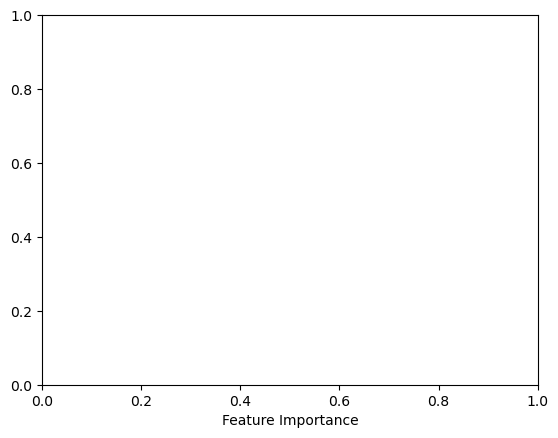

In [81]:
plt.xlabel("Feature Importance")

Text(0.5, 1.0, 'Top 10 Feature Importances (Random Forest)')

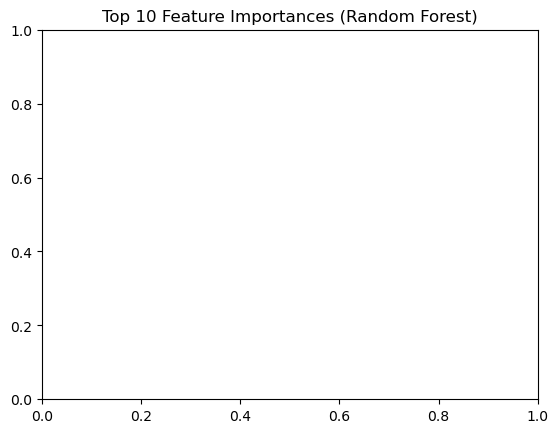

In [82]:
plt.title("Top 10 Feature Importances (Random Forest)")

In [83]:
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [85]:
plt.show()